In [1]:
from z3 import *
import numpy as np
import random
import arviz as az
import pandas as pd

import os, sys
sys.path.append(os.path.join("../../../"))

# our library
from src.mcmc_sat import mcmc

In [2]:
A = np.array([[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
[0,0,0,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
[0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0],
[0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,1,1,1,1,0],
[0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1]])

y=np.array([1087, 1008, 1068, 1204, 1158, 1151, 1143])

In [3]:
# it produced only 400 samples...
trace = mcmc.sample_mh_trace_from_conf_matrix_smt(A=A,y=y)

Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 35
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 28
Reals 0
Formula tree depth 2
--------------------------------------------
starting MeGASampler


Formula is satisfiable
Stopping: timeout
---------SOLVING STATISTICS--------
do_epoch time: 1577.45
epoch time: 1799.96
grow_seed time: 72.5509
initial_solving time: 0.00204572
output time: 1.94353
start_epoch time: 222.389
total time: 1800.01
Epochs: 56321
MAX-SMT calls: 56322
SMT calls: 0
Assignments considered (with repetitions): 5744742
Models (with repetitions): 5744742
Unique models (# samples in file): 417
-----------------------------------
The parameter `solver_samples` only contains 417 samples. Thus, every chain will contain 417 instead of 10000. Try running the SAT/SMT sampler longer to obtain more samples.


/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (28), generating only 20 plots
  warnings.warn(


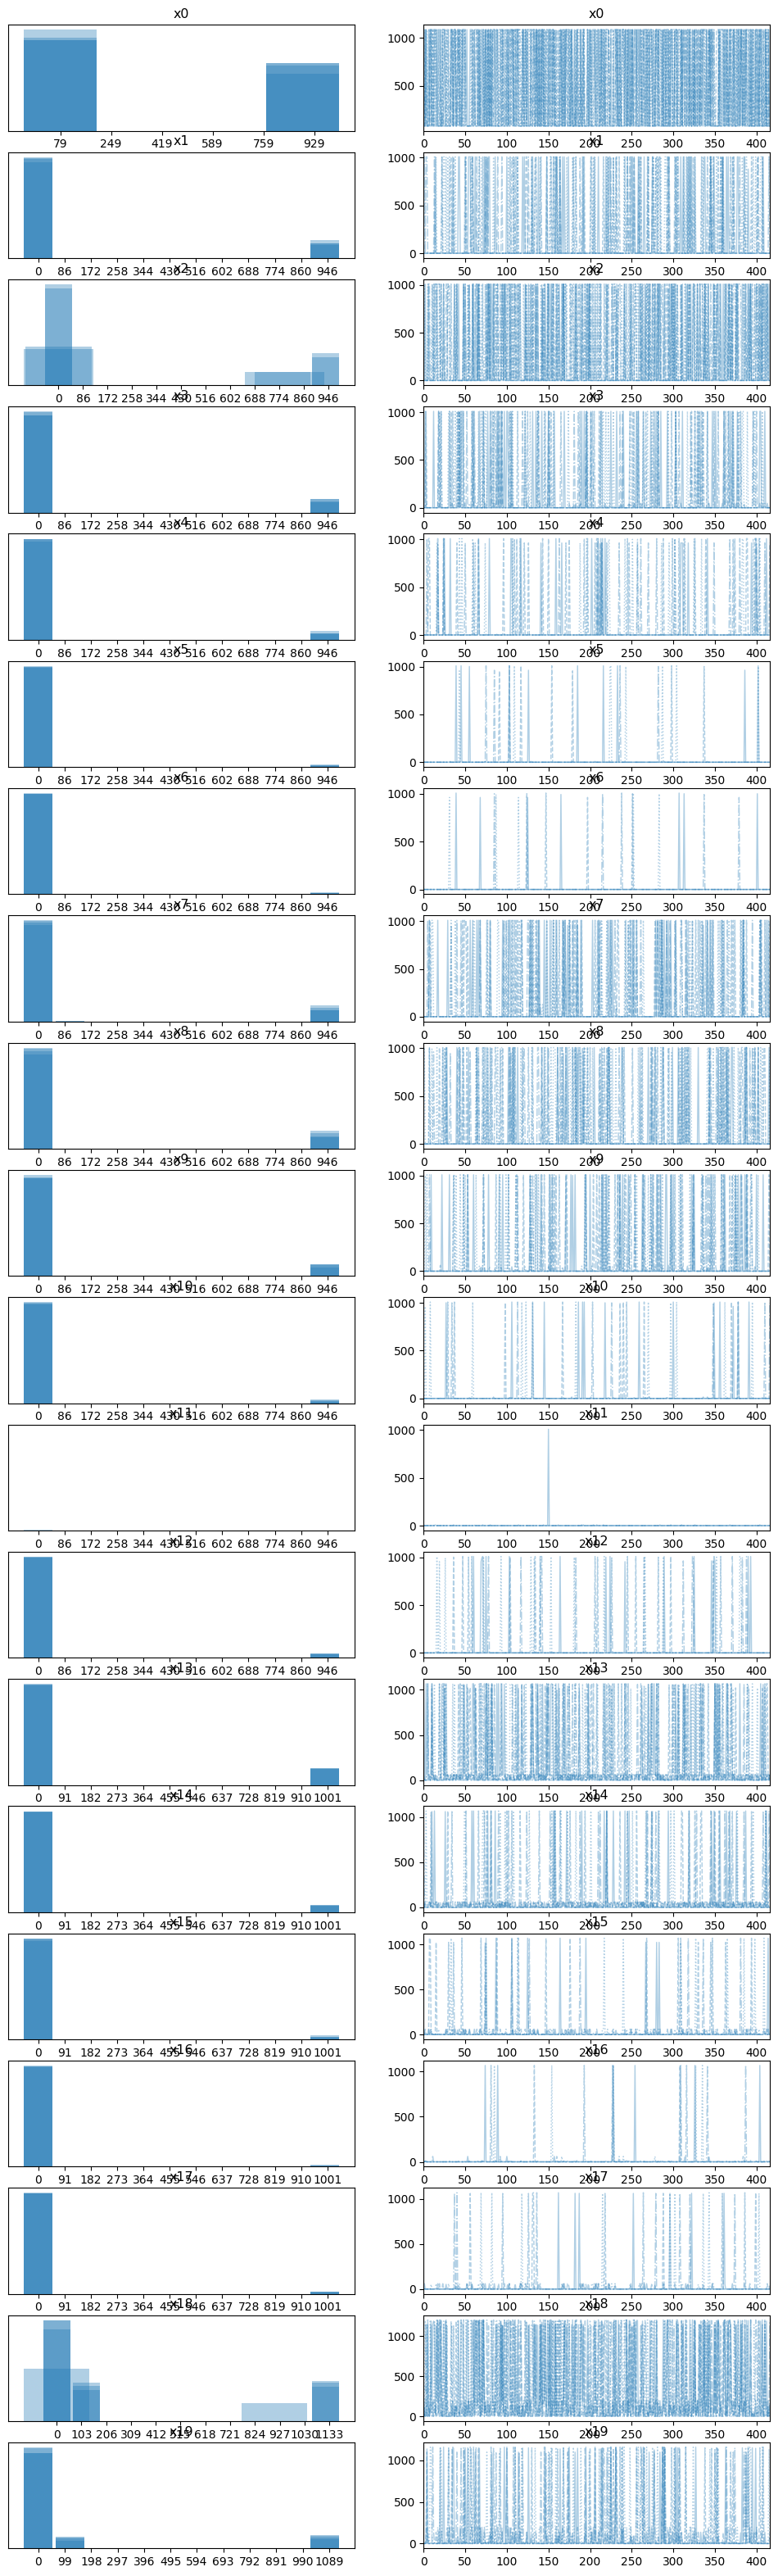

In [4]:
# Plot the posterior
import matplotlib.pyplot as plt
az.plot_trace(trace);
plt.savefig('megasampler_trace_plot.png', dpi=150);

In [5]:
# Diagnosis
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,490.242,495.267,79.0,1087.0,11.961,8.462,1720.0,1664.0,1.0
x1,136.950,345.194,0.0,1008.0,8.796,6.223,1539.0,1542.0,1.0
x2,249.769,434.851,0.0,1008.0,10.426,7.376,1734.0,1664.0,1.0
x3,113.233,316.223,0.0,1008.0,7.394,5.231,1699.0,1655.0,1.0
x4,63.781,243.286,0.0,962.0,6.137,4.340,1614.0,1541.0,1.0
x5,17.388,130.313,0.0,0.0,3.238,2.292,1597.0,1539.0,1.0
x6,12.469,110.476,0.0,0.0,2.661,1.882,1723.0,1724.0,1.0
x7,116.704,321.834,0.0,1008.0,8.173,5.780,1553.0,1542.0,1.0
x8,128.209,335.220,0.0,1008.0,8.140,5.761,1686.0,1664.0,1.0
x9,100.020,299.893,0.0,1008.0,7.320,5.178,1693.0,1664.0,1.0
